# Time Series

A simple example to show Time Series forecasting using ARIMA

Source:<br>
https://beta.bls.gov/dataViewer/view

Labor Force Statistics from the Current Population Survey

Series Title 	: 	(Seas) Unemployment Rate
Series ID 	: 	LNS14000000
Seasonality 	: 	Seasonally Adjusted
Survey Name 	: 	Labor Force Statistics from the Current Population Survey
Measure Data Type 	: 	Percent or rate
Industry 	: 	All Industries
Occupation 	: 	All Occupations
Labor Force Status 	: 	Unemployment rate
Age 	: 	16 years and over
Ethnicity 	: 	All Origins
Race 	: 	All Races
Gender 	: 	Both Sexes
Marital Status 	: 	All marital statuses
Education or Training 	: 	All educational levels

Import Libraries

In [39]:
import datetime as dt
now1 = dt.datetime.now()

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
plt.style.use("fivethirtyeight")

Read Data (from csv file)

In [40]:
headers = [pd.read_csv('data.csv', nrows=1)]
headers

[       Series ID  Year Period     Label  Value
 0  CES0000000001  1939    M01  1939 Jan  29923]

In [41]:
df = pd.read_csv('data.csv', usecols=['Label','Value'])
df.columns = ['year', 'value']
df

,year,value
0,1939 Jan,29923
1,1939 Feb,30100
2,1939 Mar,30280
3,1939 Apr,30094
4,1939 May,30299
...,...,...
966,2019 Jul,151418
967,2019 Aug,151637
968,2019 Sep,151830
969,2019 Oct,151986


Buid ARIMA model

In [42]:
model = pm.auto_arima(df.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0); AIC=13251.520, BIC=13261.274, Fit time=0.002 seconds
Fit ARIMA: order=(1, 1, 0); AIC=12942.640, BIC=12957.272, Fit time=0.027 seconds
Fit ARIMA: order=(0, 1, 1); AIC=13077.613, BIC=13092.245, Fit time=0.023 seconds
Fit ARIMA: order=(2, 1, 0); AIC=12813.543, BIC=12833.052, Fit time=0.039 seconds
Fit ARIMA: order=(2, 1, 1); AIC=12775.479, BIC=12799.866, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 1); AIC=12783.978, BIC=12803.487, Fit time=0.087 seconds
Fit ARIMA: order=(2, 1, 2); AIC=12772.803, BIC=12802.067, Fit time=0.272 seconds
Fit ARIMA: order=(1, 1, 2); AIC=12774.152, BIC=12798.539, Fit time=0.140 seconds
Total fit time: 0.690 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  970
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6380.402
Method:                       css-mle   S.D. of innovations            173.888
Date: 

Model PLots

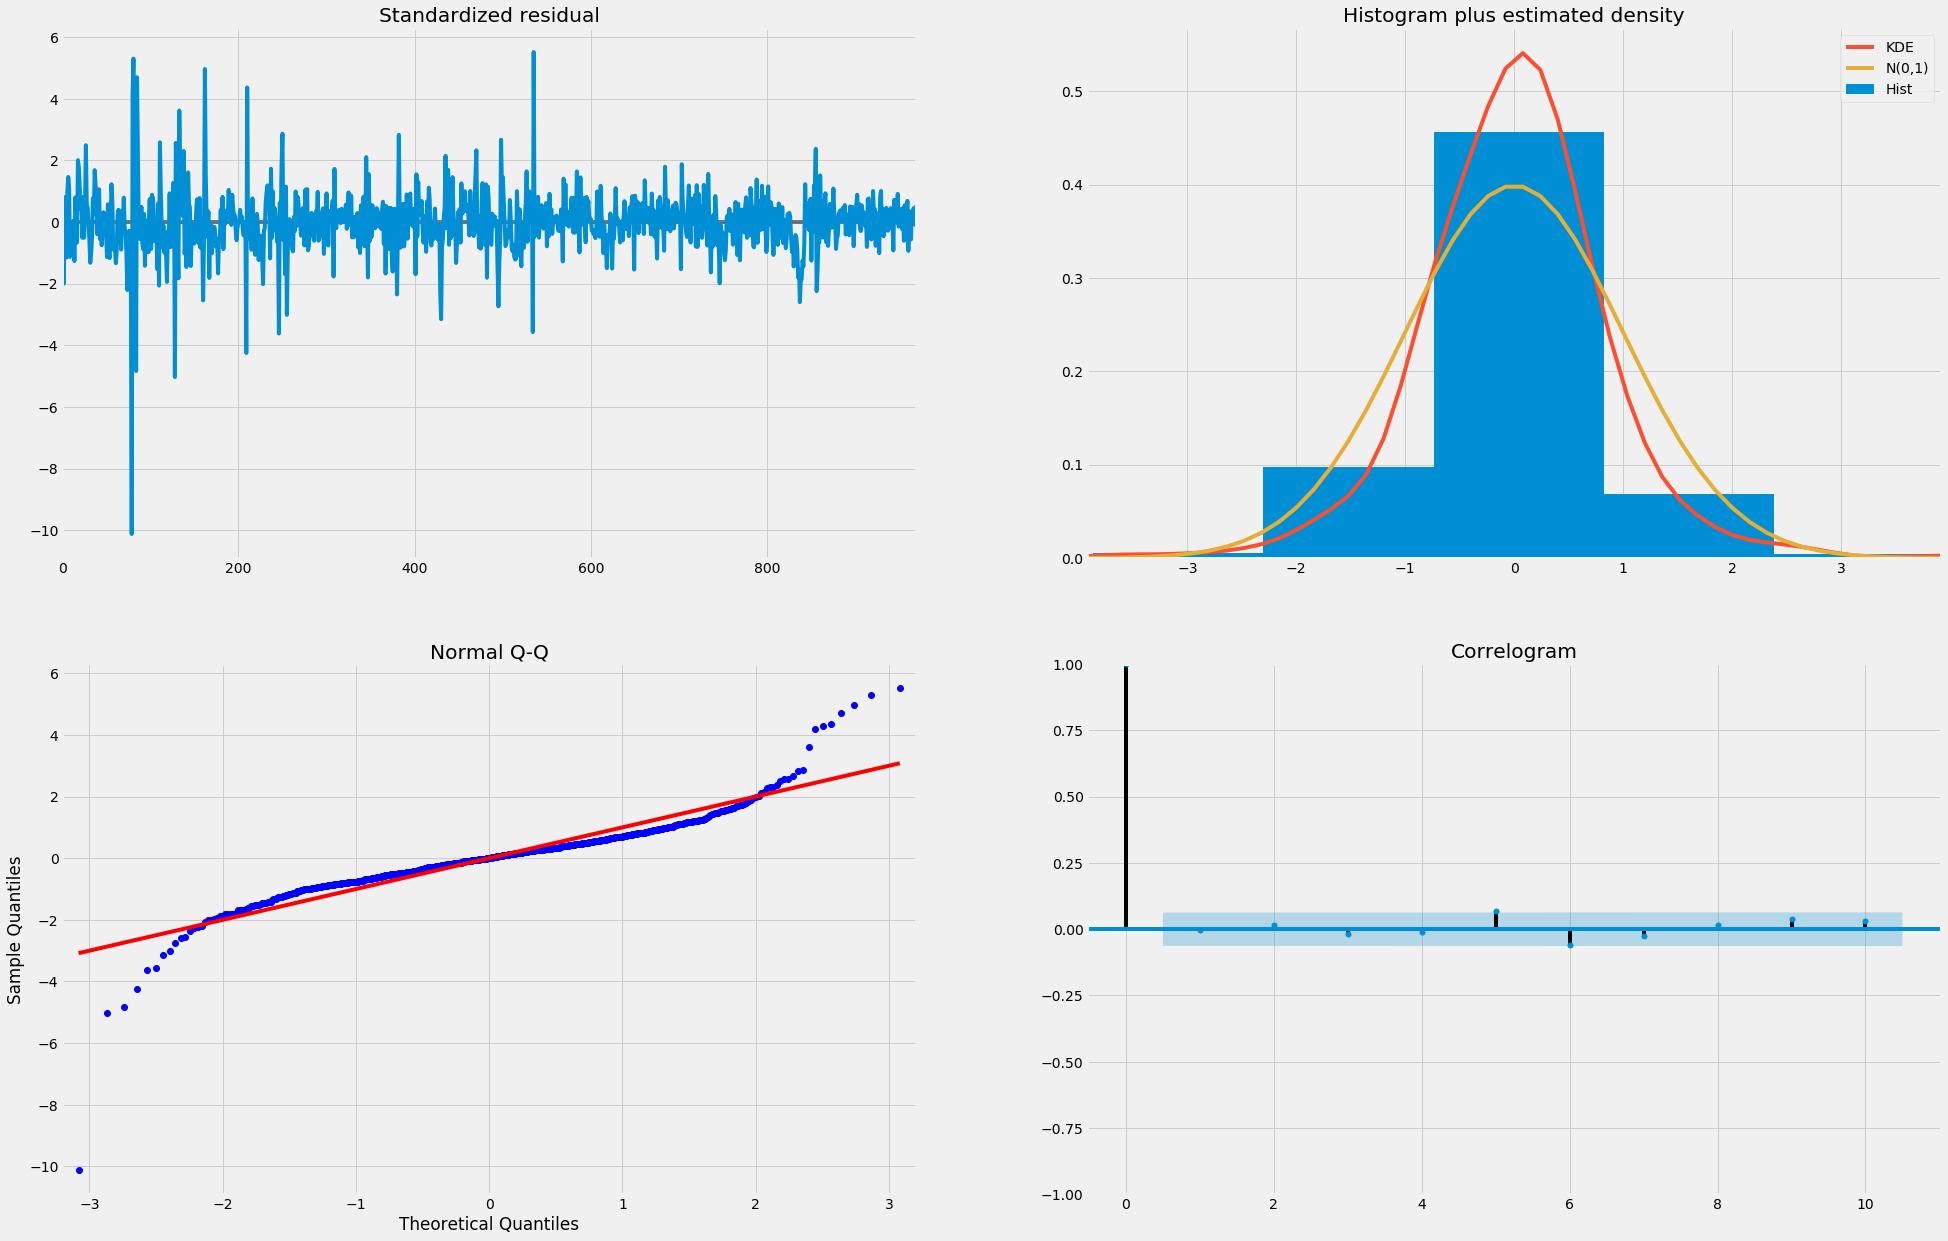

In [43]:
model.plot_diagnostics(figsize=(30,20))
plt.show()


Forecast

In [44]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(max(df.index)+1,max(df.index)+n_periods+1)
fc


array([152442.65116798, 152634.41177156, 152822.48792127, 153004.77640638,
       153180.62512462, 153350.13328557])

In [45]:
confint

array([[152101.83764771, 152783.46468826],
       [152087.88470556, 153180.93883757],
       [152059.24759556, 153585.72824699],
       [152008.21605082, 154001.33676195],
       [151937.57678528, 154423.67346395],
       [151852.25678845, 154848.0097827 ]])

In [46]:
df.tail(1)

,year,value
970,2019 Nov,152252


Plot Forecasts

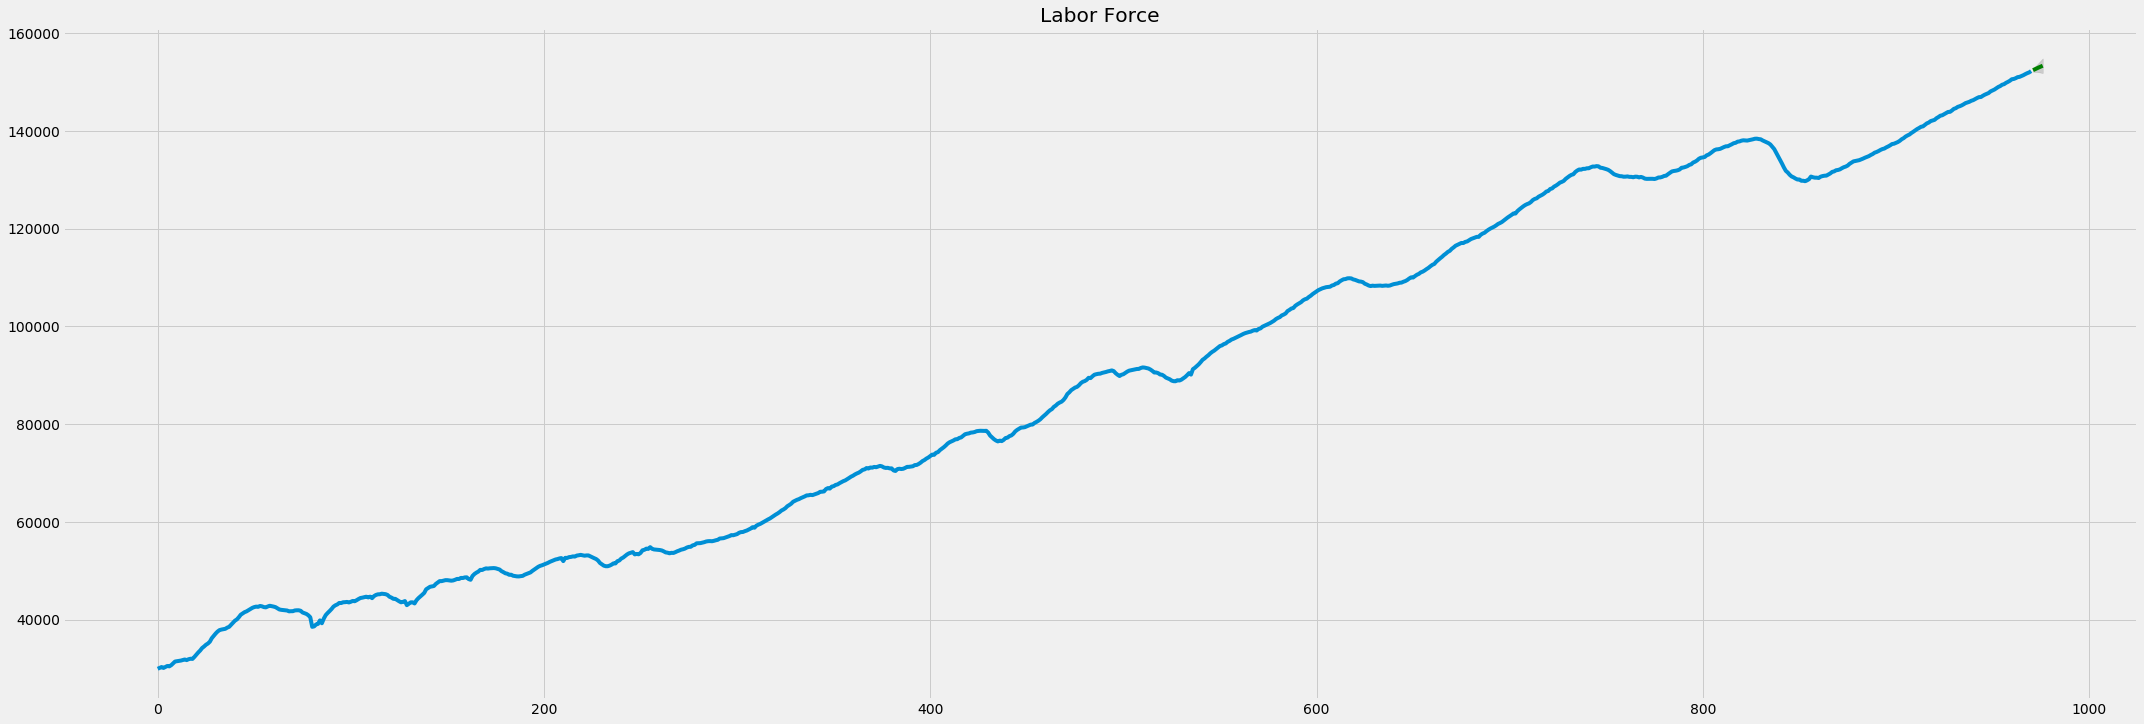

*********************************************************
*********************************************************
Processing Time:                       0:00:01.571354


In [47]:

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
rcParams['figure.figsize'] = 30,10
plt.plot(df.value)
plt.plot(fc_series, color='green')
plt.fill_between(fc_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
# plt.legend()
plt.tight_layout()
plt.title("Labor Force")

plt.show()

print("*********************************************************")
now2 = dt.datetime.now()

print("*********************************************************")
print("Processing Time:                      ",(now2-now1))

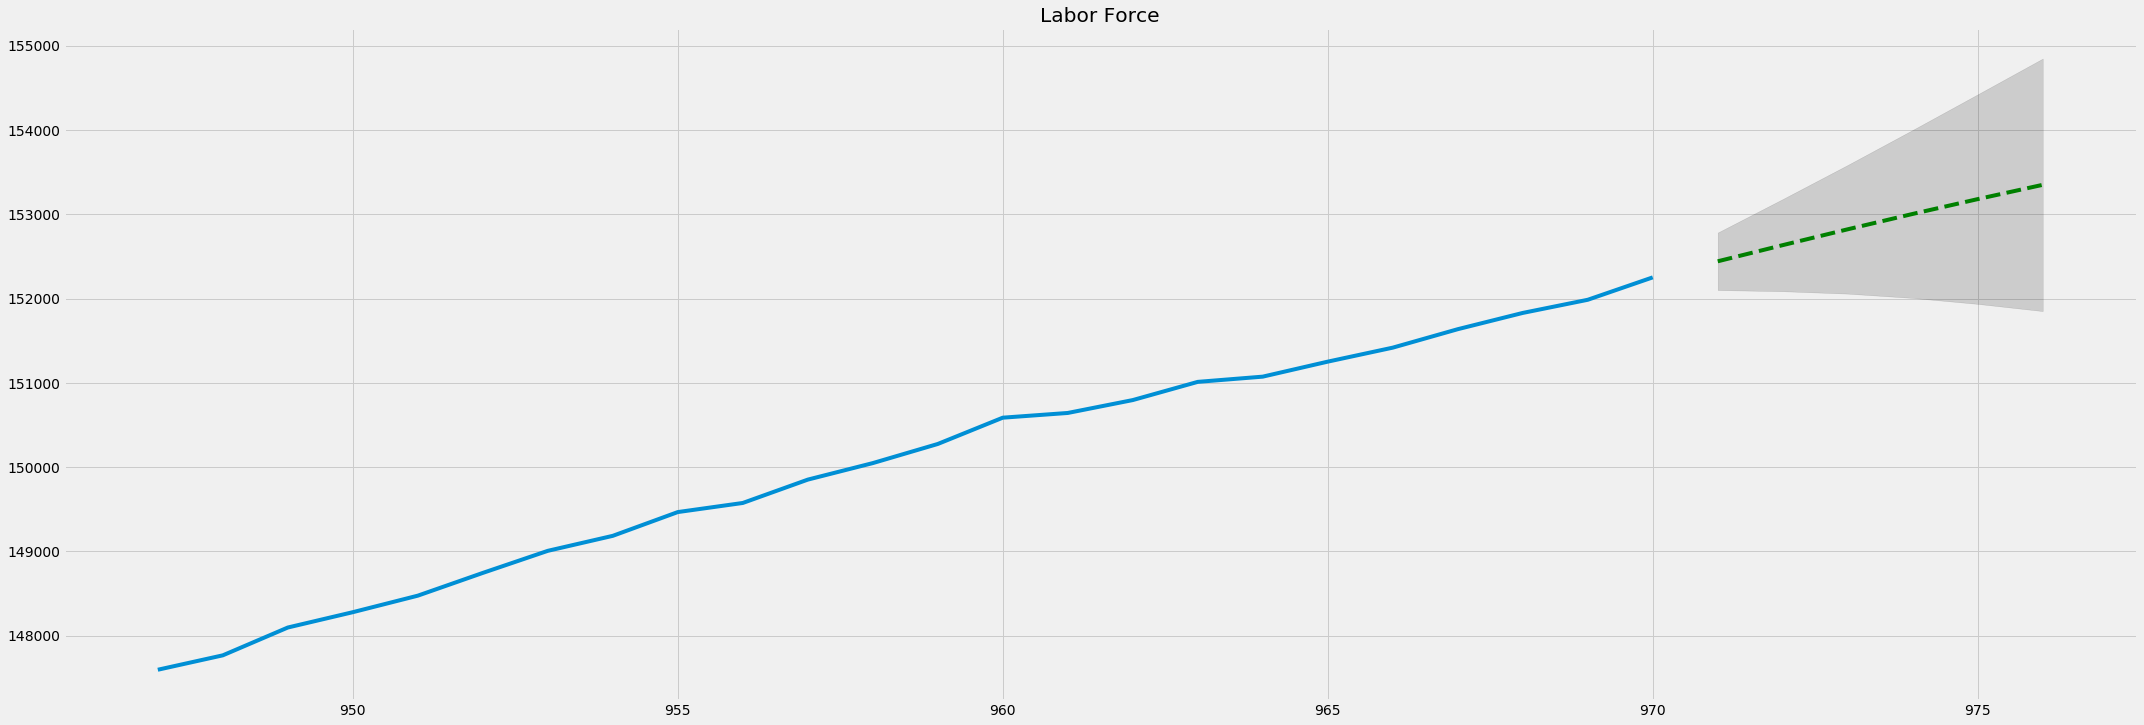

*********************************************************
*********************************************************
Processing Time:                       0:00:01.779401


In [48]:
# Zoom Plot
rcParams['figure.figsize'] = 30,10
plt.plot(df.value.tail(24))
plt.plot(fc_series, color='green', linestyle='dashed')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
# plt.legend()
plt.tight_layout()
plt.title("Labor Force")

plt.show()

print("*********************************************************")
now2 = dt.datetime.now()

print("*********************************************************")
print("Processing Time:                      ",(now2-now1))